Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nate Schaefer"
COLLABORATORS = "Nick Hageman"

---

# Introduction to Linear Regression

Note: as for lec07, this notebook is best run if you have installed the JupyterLab extension for ipywidgets (anaconda already includes ipywidgets, but the extension to allow the interactivity within Jupyter Lab still needs to be installed). Installing the JupyterLab extension does require that a package called nodejs (not included by default with anaconda).


Download and install from:
https://nodejs.org/en

For 2021, version 14.15.5 works.

This installer will attempt to update your path, so you may want to start a new terminal (Mac), or login out/login/reboot in Windows.  See slides for more details.

You can then install the labextension:

jupyter labextension install @jupyter-widgets/jupyterlab-manager

(Instructions for installation from: https://ipywidgets.readthedocs.io/en/latest/user_install.html)

If you do attempt to install, and it does not work, you remove the widget with:

jupyter lab clean

juptery lab build

If you haven't installed the JupyterLab extension for ipywidgets, the code should still work (as anaconda still includes the ipywidgets package), you just will not be able to use the interactive functionality (e.g., use of sliders to change parameter values). 

In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, neighbors,
                     model_selection as skms,
                     linear_model, metrics)
import ipywidgets as widgets
from ipywidgets import interact

## Using sklearn's linear regression with either the diabetes dataset or the boston dataset 

In the cell below, we review sklearn's "workflow" for training/testing a linear regression model. We also provide the option (by changing the dataset_name variable) to use either the diabetes dataset (as used in the past and in your textbook) or the boston dataset. Below is more information about the target/features in each of these datasets from the sklearn documentation:

#### Diabetes dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Target in diabetes dataset: quantitative measure of disease progression one year after baseline

Features in diabetes dataset:
* Age
* Sex
* Body mass index
* Average blood pressure
* S1
* S2
* S3
* S4
* S5
* S6


#### Boston dataset
Target in Boston dataset: Median value of owner-occupied homes in $1000’s

Features in Boston dataset:
* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per $10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population

In [16]:
# obtain dataset
dataset_name = 'diabetes'
#dataset_name = 'boston'

if (dataset_name == 'boston'):
    dataset = datasets.load_boston()
else:    
    dataset = datasets.load_diabetes()

# split into training/testing datasets (25% for testing)
(train_ftrs, 
 test_ftrs,
 train_tgt, 
 test_tgt) = skms.train_test_split(dataset.data,
                                   dataset.target,
                                   test_size=.25)

# also create training dataframe (for future use)
train_df = pd.DataFrame(train_ftrs,
                        columns = dataset.feature_names)
train_df['target'] = train_tgt

# define linear regression model 
model = linear_model.LinearRegression()

# train the model
fit = model.fit(train_ftrs, train_tgt)

# apply trained model to test-set features
predictions = fit.predict(test_ftrs)

# evaluate regression approach with root mean square error
score = np.sqrt(metrics.mean_squared_error(test_tgt,
                                           predictions))
print(f'Model RMSE: {score:0.2f}')

Model RMSE: 59.81


## Examples of linear regression with a single feature (target = slope*feature_value + intercept)

### Toy example

Below we provide a "toy" (i.e., very small) dataset with one feature for which to fit a 1D linear regression model:

$y = mx + b$

where $y$ is each predicted target value, $x$ is each feature value, and $m$ and $b$ are to be determined during training such that the sum of the squared errors between the actual target values and the predicted target values are as small as possible.

slope: 0.57
intercept: 1.51


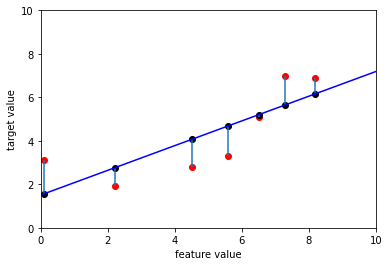

,feature,target,prediction,dist,squared error
0,7.3,7.0,5.653797,1.346203,1.812262
1,2.2,1.9,2.759752,0.859752,0.739173
2,4.5,2.8,4.064909,1.264909,1.599996
3,5.6,3.3,4.689115,1.389115,1.929641
4,0.1,3.1,1.568086,1.531914,2.346760
5,8.2,6.9,6.164511,0.735489,0.540944
6,6.5,5.1,5.199829,0.099829,0.009966


SSE: 8.98
RMSE: 1.13


In [17]:
# plot toy set of feature/target points 
# (in this example, assume all are in a training set)
feature_values = np.array([7.3, 2.2, 4.5, 5.6, 0.1, 8.2, 6.5])
target_values = np.array([7.0, 1.9, 2.8, 3.3, 3.1, 6.9, 5.1])
plt.scatter(feature_values,target_values,c='r');
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('feature value')
plt.ylabel('target value')

# if desired, also plot best-fit line (determined using sklearn)
# and scatter plot of predicted targets (points along the 
# best-fit line) with lines to indicate the distances between
# the actual target values and predicted target values
# also compute/display errors
plot_best_fit_line = True
if (plot_best_fit_line):
    # use sklearn to determine slope/intercept of best-fit line
    model_ex = linear_model.LinearRegression()
                        # fit() expect an nx1 2D array (1 feature, multiple values)
                    # alternatively, you can do .reshape(1, -1) for one sample 
    fit_ex = model_ex.fit(feature_values.reshape(-1, 1), # n x 1 2D array where n is determined automatically
                          target_values)
    slope = fit_ex.coef_[0]
    intercept = fit_ex.intercept_
    print(f'slope: {slope:.2f}')
    print(f'intercept: {intercept:.2f}')
    
    # option to try another line:
    #slope=0.5
    #intercept=2

    # plot best-fit line
    x = np.linspace(0,10,2) # only need two points to plot line
    y = slope*x + intercept
    plt.plot(x,y,'b');

    # plot scatter of predictions and display lines 
    # between targets and predicted targets
    target_predictions = slope*feature_values + intercept
    plt.scatter(feature_values,target_predictions,c='k');
    plt.vlines(feature_values,  # x, ymin, ymax
               target_values,
               target_predictions);
    plt.show()
    
    # compute/display errors
    se = (target_predictions-target_values)**2
    display(pd.DataFrame({'feature': feature_values,
                          'target': target_values,
                          'prediction': target_predictions,
                          'dist': np.sqrt(se),
                          'squared error': se}))
    print(f'SSE: {np.sum(se):.2f}')
    print(f'RMSE: {np.sqrt(np.mean(se)):.2f}')

### 1D linear regression using one feature from sklearn dataset

In the cell below, we extract a single feature from the sklearn dataset chosen previously (either diabetes or boston) and (if the jupyterlab extension for ipywidgets is installed), provide sliders to change the slope/intercept of a candidate line, displaying the line and error metrics. In this way, you can "mimic" performing the training process to determine $m$ and $b$ for a best-fit line. (Note, for 1D linear regression, the best parameters can actually be determined via an equation, which you usually learn about in a statistics course.) If the compare_to_sklearn option is checked, we also compute the best-fit line using sklearn and display the associated $m$, $b$, and errors.

In [18]:
# define default parameters based on dataset chosen previously
if (dataset_name == 'boston'):
    slope_vals = (-25, 25, .01)
    intercept_vals = (-80, 80, 1)
else:
    slope_vals = (-1500,1500,1)
    intercept_vals = (0,300,1)
@interact
def plot_1D_linear_regression(feature = dataset.feature_names,
                              slope = slope_vals,
                              intercept = intercept_vals,
                              compare_to_sklearn = False):
    sns.scatterplot(x=feature,y="target",data=train_df)
    x = np.array([train_df[feature].min(), 
                  train_df[feature].max()])
    y = slope*x + intercept
    plt.plot(x,y,'r')
    plt.ylim(0, train_df['target'].max())
    predicted_target = slope*train_df[feature] + intercept
    se = (predicted_target - train_df['target'])**2
    sse = np.sum(se)
    mse = sse/len(predicted_target)
    rmse = np.sqrt(mse)
    print(f'SSE: {sse:.0f}')
    print(f'RMSE: {rmse:.3f}')
    
    if (compare_to_sklearn):
        print('\nCompare to sklearn: ')
        # keep one feature 
        train_df_limited = train_df[[feature]]
        # compute linear regression model with one feature
        model_limited = linear_model.LinearRegression()
        fit_limited = model_limited.fit(train_df_limited, train_tgt)
        print(f'slope: {model_limited.coef_[0]:.2f}')
        print(f'intercept: {model_limited.intercept_:.2f}')
        # compute RMSE on training data 
        # (to best mimic what is done during training)
        predictions_limited = fit_limited.predict(train_df_limited)
        score_limited = np.sqrt(metrics.mean_squared_error(train_tgt,
                                                           predictions_limited))
        print(f'RMSE: {score_limited:0.3f}')

interactive(children=(Dropdown(description='feature', options=('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's…

## Example of linear regression with multiple features

Towards the beginning of this notebook, we had already trained a linear regression model (in a variable called $model$) using all of the features in either the diabetes dataset or the boston dataset. Below, we look at the trained model more closely by displaying the determined coefficient values (stored in model.coef_) in a table and the intercept (stored in model.intercept_). We also display the corresponding linear regression equation of the form:

$y = m_0 f_0 + m_1 f_1 + \cdots m_{n-1} f_{n-1} + b$

where $y$ is the predicted target value, $[f_0, f_1, \cdots, f_{n-1}]$ are the feature values, $[m_0, m_1, \cdots, m_{n-1}]$ are the determined coefficients, and $b$ is the determined intercept. 

In [19]:
# look more closely at coefficients and intercept
#print(model.coef_)
display(pd.DataFrame(list(zip(model.coef_,dataset.feature_names)),
                     columns = ['coefficient', 'feature']))

print(f'Intercept: {model.intercept_:.2f}')

# also display corresponding equation
print(f'\nPredicted Target = {model.coef_[0]:.2f}*{dataset.feature_names[0]}')
for coeff_value, feature_name in zip(model.coef_[1:], dataset.feature_names[1:]):  # strange format
    print(f'                  + {coeff_value:.2f}*{feature_name}')
print(f'                  + {model.intercept_:.2f}')

,coefficient,feature
0,-91.700480,age
1,-299.465458,sex
2,507.419357,bmi
3,388.617821,bp
4,-722.028249,s1
5,386.258585,s2
6,131.374469,s3
7,212.210216,s4
8,787.881218,s5
9,36.003512,s6


Intercept: 152.41

Predicted Target = -91.70*age
                  + -299.47*sex
                  + 507.42*bmi
                  + 388.62*bp
                  + -722.03*s1
                  + 386.26*s2
                  + 131.37*s3
                  + 212.21*s4
                  + 787.88*s5
                  + 36.00*s6
                  + 152.41


## Assignment

For your assignment, you will work with the 2019 College Football dataset (as we have used previously) and use linear regression to predict the number of wins from the rushing yards per game, rushing yards per game allowed, pass yards per game and pass yards per game allowed (as we also did in lec08, but using k-NN regression). As in lec08, in the cell below we set up the dataframe and purposely leave out Iowa from the dataset (you do NOT need to modify this cell).

In [20]:
# load 2019 College Football dataset and extract desired information
cfb_orig_df = pd.read_csv("CFB2019.csv")
# extract bowl eligibility from the Wins-Loss column
# first separate Win-Loss into 2D array of Win and Loss strings
w_l = np.array([w_l_str.split('-') for w_l_str in cfb_orig_df['Win-Loss']])
# extract first column as wins (and convert to integers)
wins = w_l[:,0].astype(int)

# extract some of the existing columns as a starting point for our smaller dataset
cfb_df = cfb_orig_df[['Rushing Yards per Game',
                      'Rush Yards Per Game Allowed',
                      'Pass Yards Per Game',
                      'Pass Yards Per Game Allowed']].copy()
# add the wins column
cfb_df['Wins'] = wins
# make the team column the index labels
cfb_df.index = cfb_orig_df['Team']

# remove Iowa so that not used for training/testing 
# (as we will perform a separate prediction later)
iowa_values = cfb_df.loc['Iowa (Big Ten)',:]
print(iowa_values)
cfb_df.drop('Iowa (Big Ten)',inplace=True)

# display first five rows
display(cfb_df.head())

Rushing Yards per Game         137.6
Rush Yards Per Game Allowed    112.5
Pass Yards Per Game            228.9
Pass Yards Per Game Allowed    195.7
Wins                            10.0
Name: Iowa (Big Ten), dtype: float64


,Rushing Yards per Game,Rush Yards Per Game Allowed,Pass Yards Per Game,Pass Yards Per Game Allowed,Wins
Team,,,,,
Air Force (Mountain West),298.5,100.5,123.2,219.1,11
Akron (MAC),47.6,213.5,195.6,200.4,0
Alabama (SEC),168.5,137.2,342.2,187.2,11
Appalachian St. (Sun Belt),231.4,129.4,201.7,206.7,13
Arizona (Pac-12),174.0,181.6,266.1,289.8,4


### Part I

In the cell below, using the cfb_df created above as the entire dataset, apply sklearn's linear regression model for training/testing (using 30% of the data in cfb_df for testing) and display the resulting root mean squre error (RMSE) on the test set. The target is the number of wins. Hint: this should be extremely similar to what was done in lec08.

In [34]:
# YOUR CODE HERE
#raise NotImplementedError()

cfb_target = cfb_df['Wins']

cfb_features = cfb_df.drop(['Wins'],axis=1)


(cfb_train_ftrs, 
 cfb_test_ftrs,
 cfb_train_tgt, 
 cfb_test_tgt) = skms.train_test_split(cfb_features,
                                   cfb_target,
                                   test_size=.30)


model = linear_model.LinearRegression()


fit = model.fit(cfb_train_ftrs, cfb_train_tgt)


predictions = fit.predict(cfb_test_ftrs)


score = np.sqrt(metrics.mean_squared_error(cfb_test_tgt,
                                           predictions))


predictions = fit.predict(cfb_test_ftrs)
score = np.sqrt(metrics.mean_squared_error(cfb_test_tgt,
                                           predictions))
print(f'Model RMSE: {score:0.2f}')

Model RMSE: 1.63


### Part II

Display the resulting coefficients of the linear equation for each feature name (e.g., as a pandas DataFrame table or equation as we did for the diabetes/boston dataset). Also display the intercept. Use the equation (WITHOUT calling fit.predict) to predict/display the number of wins using the Iowa feature values (stored in iowa_values). See lec08 for an example of extracting each of these feature values separately, if desired. Also, recall that you can obtain the feature names in this case with cfb_train_ftrs.columns.

In [58]:
# YOUR CODE HERE
#raise NotImplementedError()
display(fit.coef_)

print(fit.coef_[0], "is the coefficient for Rushing Yards per Game")
print(fit.coef_[1], "is the coefficient for Rush Yards Per Game Allowed")
print(fit.coef_[2], "is the coefficient for Pass Yards Per Game")
print(fit.coef_[3], "is the coefficient for Pass Yards Per Game Allowed")



# other way to do it
display(pd.DataFrame(list(zip(model.coef_,cfb_train_ftrs.columns)),
                     columns = ['coefficient', 'feature']))

print(f'Intercept: {model.intercept_:.2f}')


print(f'\nPredicted Target = {model.coef_[0]:.2f}*{cfb_train_ftrs.columns[0]}')
for coeff_value, feature_name in zip(model.coef_[1:], cfb_train_ftrs.columns[1:]):  
    print(f'                  + {coeff_value:.2f}*{feature_name}')
print(f'                  + {model.intercept_:.2f}')
display(iowa_values)

iowa_ftrs_df = pd.DataFrame([iowa_values])

iowa_predicted_wins = iowa_values['Rushing Yards per Game'] * model.coef_[0] - iowa_values['Rush Yards Per Game Allowed'] * model.coef_[0] + iowa_values['Pass Yards Per Game'] * model.coef_[0] - iowa_values['Pass Yards Per Game Allowed'] * model.coef_[0] + model.intercept_

print(iowa_predicted_wins)

array([ 0.03080468, -0.03460739,  0.03022551, -0.027335  ])

0.03080467590021726 is the coefficient for Rushing Yards per Game
-0.034607394579700725 is the coefficient for Rush Yards Per Game Allowed
0.030225512512047175 is the coefficient for Pass Yards Per Game
-0.027335000264605995 is the coefficient for Pass Yards Per Game Allowed


,coefficient,feature
0,0.030805,Rushing Yards per Game
1,-0.034607,Rush Yards Per Game Allowed
2,0.030226,Pass Yards Per Game
3,-0.027335,Pass Yards Per Game Allowed


Intercept: 6.34

Predicted Target = 0.03*Rushing Yards per Game
                  + -0.03*Rush Yards Per Game Allowed
                  + 0.03*Pass Yards Per Game
                  + -0.03*Pass Yards Per Game Allowed
                  + 6.34


Rushing Yards per Game         137.6
Rush Yards Per Game Allowed    112.5
Pass Yards Per Game            228.9
Pass Yards Per Game Allowed    195.7
Wins                            10.0
Name: Iowa (Big Ten), dtype: float64

8.136227180760429


### Part III

Also predict/display the number of wins using the Iowa feature values (stored in iowa_values) by calling the fit.predict function (you should get the same prediction as in Part II).

Hint: Remember that fit.predict expects a pd.DataFrame datatype as input, as we had computed in lec08, you would want to create a DataFrame first (with appropriate column names):

iowa_ftrs_df = pd.DataFrame([iowa_values])

and using something like the following (also see the solution to the lec08 assignment):

fit.predict(iowa_ftrs_df)

(Also remember that iowa_values also contains win information, so you would need drop this information from your iowa_ftrs_df to only retain the features to use.)

In [59]:
# YOUR CODE HERE
#raise NotImplementedError()
iowa_ftrs_df = pd.DataFrame([iowa_values])
display(iowa_ftrs_df)
iowa_ftrs_df = iowa_ftrs_df.drop("Wins",axis=1)
predictions = fit.predict(iowa_ftrs_df)
print(predictions)

,Rushing Yards per Game,Rush Yards Per Game Allowed,Pass Yards Per Game,Pass Yards Per Game Allowed,Wins
Iowa (Big Ten),137.6,112.5,228.9,195.7,10.0


[8.25486635]
